In [2]:
import sqlite3
 

In [3]:
def run_query(query):
    result = None
    try:
        # Connect to DB and create a cursor
        sqlite_connection = sqlite3.connect('db.sqlite3')
        cursor = sqlite_connection.cursor()
        cursor.execute(query) 
        # Fetch and output result
        result = cursor.fetchall()
        # Close the cursor
        cursor.close()
        
    # Handle errors
    except sqlite3.Error as error:
        print('Error occurred - ', error)
 
    # Close DB Connection irrespective of success
    # or failure
    finally:
        if sqlite_connection:
            sqlite_connection.close()
    return result

In [18]:
query_1 = '''
    SELECT
        count(turns.id) as number_of_turns,
        turns.game_id as game_id,
        player.name as name
    FROM
        db_player as player
    JOIN 
        db_turn as turns ON turns.player_id = player.id
    GROUP BY
        turns.game_id,
        turns.player_id
    '''
query_2 = '''
    SELECT
        avg(number_of_turns),
        name
    FROM
        ({})
    GROUP BY
        name
'''.format(query_1)

run_query(
    query_2
)

[(14.363512361466325, 'BiggestFirst'),
 (14.714919011082694, 'Replacement'),
 (14.039386189258312, 'Tunnels')]

In [25]:
import matplotlib.pyplot as plt 
import numpy as np

query_1 = '''
    SELECT
        id, name
    FROM
        db_player as player
    '''

players=run_query(
    query_1
)
print(f"{len(players)} number of players")
def make_graph_for(player):
    id, name = player
    query_1 = '''
        SELECT
            count(turns.id) as number_of_turns
        FROM
            db_player as player
        JOIN 
            db_turn as turns ON turns.player_id = player.id
        WHERE player_id = {} 
        GROUP BY
            turns.game_id,
            turns.player_id
        
        '''.format(id)

    data=run_query(
        query_1
    )
    data = [i[0] for i in data]
    # Define the bin edges for groups of 5
    bin_size = 2
    bin_edges = range(0, max(data) + bin_size, bin_size)

    # Create histogram
    plt.hist(data, bins=bin_edges, edgecolor='black')

    # Add titles and labels
    plt.title(name)
    plt.xlabel('Value Range')
    plt.ylabel('Frequency')


3 number of players


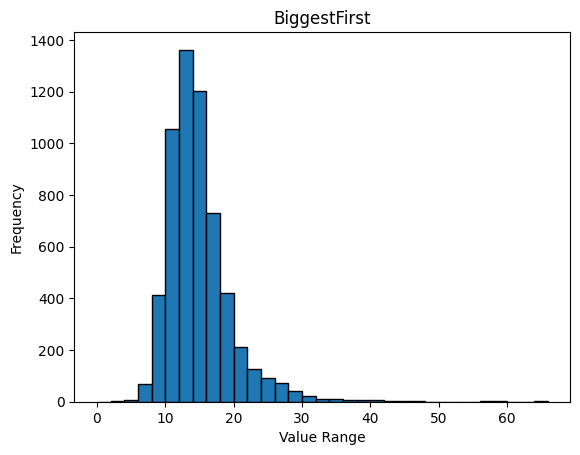

In [26]:
make_graph_for(players[0])

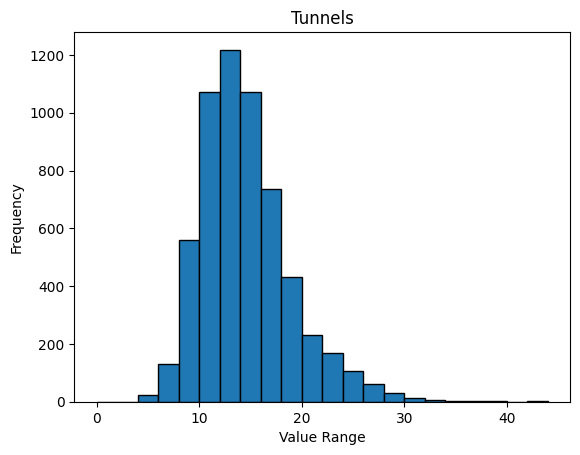

In [27]:
make_graph_for(players[1])

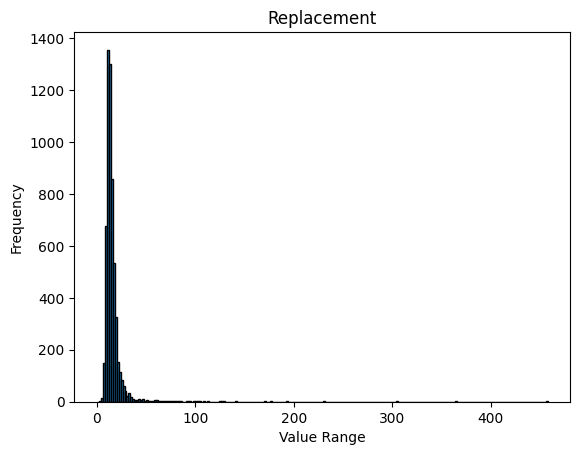

In [28]:
make_graph_for(players[2])

In [10]:
query_1 = '''
    SELECT
        count(turns.id) as number_of_turns,
        turns.game_id as game_id,
        player.name as name,
        turns.turn_type as type
    FROM
        db_player as player
    JOIN 
        db_turn as turns ON turns.player_id = player.id
    GROUP BY
        turns.game_id,
        turns.player_id,
        turns.turn_type
    '''
query_2 = '''
    SELECT
        avg(number_of_turns),
        name,
        type
    FROM
        ({})
    GROUP BY
        name,
        type
'''.format(query_1)

data = run_query(
    query_2
)



In [ ]:

"""select name, count(game_id) from (SELECT
        count(turns.id) as number_of_turns,
        turns.game_id as game_id,
        player.name as name,
        turns.turn_type as type
    FROM
        db_player as player
    JOIN 
        db_turn as turns ON turns.player_id = player.id
    GROUP BY
        turns.game_id,
        turns.player_id,
        turns.turn_type
        ) where number_of_turns > 100 GROUP BY name"""
